TODO LIST  
>对`data`缺失项进行插值或赋零

In [2]:
import platform
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
os_name = platform.system()
if(os_name == "Darwin"):
    #MacOS
    plt.rcParams['font.family'] = 'sans-serif'    
    plt.rcParams['font.sans-serif'] = ['Heiti TC']
else:
    #maybe Windows
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
data = pd.read_csv('./data.csv',index_col = 0 )
'''
如果上一行是 `data = pd.read_csv('./data.csv')`
可以在这里加一行`data.set_index('date')`达到相同效果
'''
index = data.index #有了上一行之后 这里使用data.date就会报错了
data

,卧推(kg*12x3),硬拉(kg*12x3),有氧描述,有氧时长(min),深蹲(kg*12x3)
date,,,,,
2025/02/28,12.0,15.0,放松慢跑,15,NaN
2025/03/01,NaN,20.0,慢跑,30,NaN
2025/03/02,20.0,NaN,慢跑,17,30.0
2025/03/04,20.0,30.0,慢跑,20,NaN


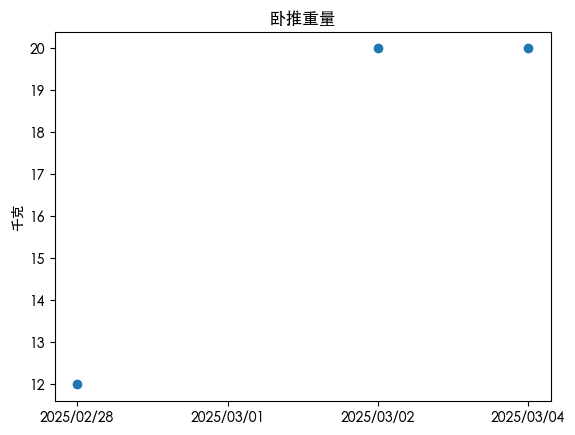

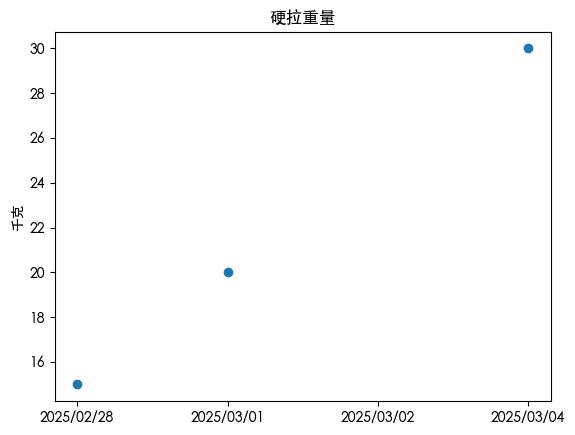

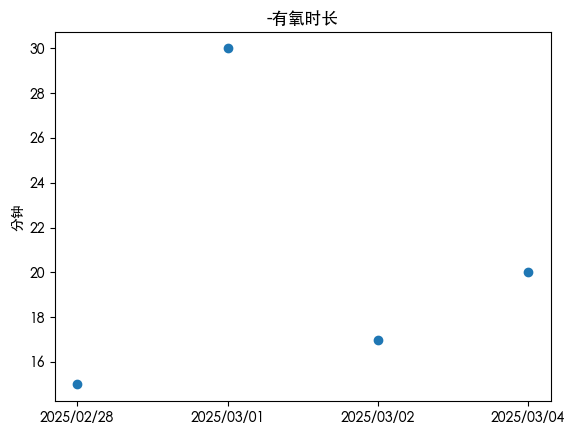

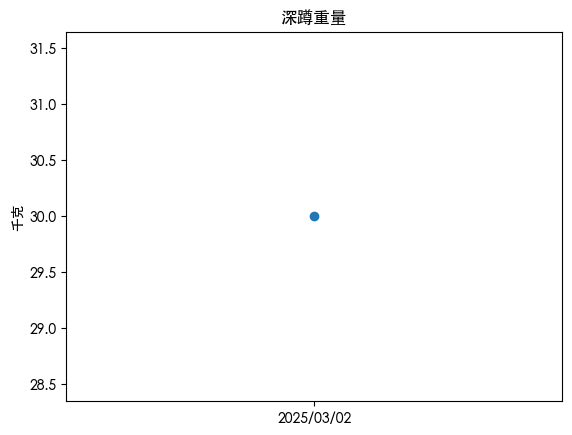

In [3]:
plt.scatter(index, data.iloc[:,0])
plt.title("卧推重量")
plt.ylabel('千克')
plt.show()

plt.scatter(index, data.iloc[:,1])
plt.title("硬拉重量")
plt.ylabel('千克')
plt.show()

plt.scatter(index, data.iloc[:,3])
plt.title("-有氧时长")
plt.ylabel('分钟')
plt.show()

plt.scatter(index, data.iloc[:,4])
plt.title("深蹲重量")
plt.ylabel('千克')
plt.show()